<a href="https://colab.research.google.com/github/Cristianoaf81GIT/curso_google_earth_engine_python/blob/main/primeira_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print("Alunos do minicurso de gee")


Alunos do minicurso de gee


In [4]:
## Variaveis
inteiro = 1
decimal = 1.5
print(inteiro)
print(decimal)

1
1.5


In [5]:
import sys # to install in jupyter notebook
#!pip install earthengine-api -q
#!pip install geemap -q or 
!{sys.executable} -m pip install earthengine-api -q
!{sys.executable} -m pip install geemap -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 68.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00


In [6]:
import ee
import geemap

ee.Authenticate()
ee.Initialize()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=jO9WetlnesymTTc57epEiQ01d4rErQRnZAqMJwYh6Ag&tc=dk36nSP0iUZvzcATbZ0PXWOysUisKJURfUuWU9toFMA&cc=xJWATYBgCgCFFH4218V4JK1C0ZWR4LZmaCW7piHl0ZU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VN4-5obmom1QgpeOQqK8qGh15hkDsW00PJKKzHNkpt0nJsls2jjmto

Successfully saved authorization token.


In [11]:
srtm = ee.Image("USGS/SRTMGL1_003")
map = geemap.Map()
map.addLayer(srtm)
map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [13]:
vis = {
    'min': 0,
    'max': 2000,
    'palete': ['9e0142', 'f88d52', 'ffffbf', '89d0a4', '5e4fa2']
}

srtm = ee.Image("USGS/SRTMGL1_003")
map = geemap.Map(location=('-18.08', '-54.57'), zoom=5)
map.addLayer(srtm, vis_params=vis, name='SRTM')

## exportar imagem para drive
## 1 definir regiao de interesse
roi = ee.Geometry.Polygon(
        [[[-41.20635112696323, -10.272353817277876],
          [-41.20635112696323, -12.018498895633288],
          [-39.05303081446323, -12.018498895633288],
          [-39.05303081446323, -10.272353817277876]]]);


# 2 criar funcao para download
task = ee.batch.Export.image.toDrive(
  image=srtm,
  region=roi,
  folder='minicursogee',
  fileNamePrefix='Srtm_bahia',
  scale=30,
  maxPixels=1e13,
  crs='EPSG:4674'
)

# 3 executar a tarefa
task.start()

# pode-se verificar o status da tarefa
# task.status()

In [14]:
task.status()


{'state': 'RUNNING',
 'description': 'myExportImageTask',
 'creation_timestamp_ms': 1683388728048,
 'update_timestamp_ms': 1683389041633,
 'start_timestamp_ms': 1683388740623,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'id': 'HZQX3WW3BIR3NGNM4V4ZYIRC',
 'name': 'projects/earthengine-legacy/operations/HZQX3WW3BIR3NGNM4V4ZYIRC'}

###Extrair dados da região

* usar redutores gee
* importar biblioteca pandas (instalação também)
* importar biblioteca matplotlib 



In [20]:
# 1 criar redutor
redutores = ee.Reducer.mean().combine(**{
    'reducer2': ee.Reducer.min(),
    'sharedInputs': True
}).combine(**{
    'reducer2': ee.Reducer.max(),
    'sharedInputs': True
})
# use combinacao para extrair dados

estatisticas_zonais = srtm.reduceRegion(**{
    'reducer': redutores,
    'geometry': roi,
    'scale': 30,
    'bestEffort': True,
    'maxPixels': 1e13,
    'tileScale':4
})

print(estatisticas_zonais.getInfo())

# import de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# transformar dados em lista
stats_list = ee.List(estatisticas_zonais).getInfo()
data = list(stats_list.items())
data
df = pd.DataFrame(data, columns=['elevação', 'valor'])
df



{'elevation_max': 1272, 'elevation_mean': 496.4275892744885, 'elevation_min': 158}


,elevação,valor
0,elevation_max,1272.000000
1,elevation_mean,496.427589
2,elevation_min,158.000000


In [21]:
 vals = df['valor']
 labels = df['elevação']
 vals
 labels

0     elevation_max
1    elevation_mean
2     elevation_min
Name: elevação, dtype: object

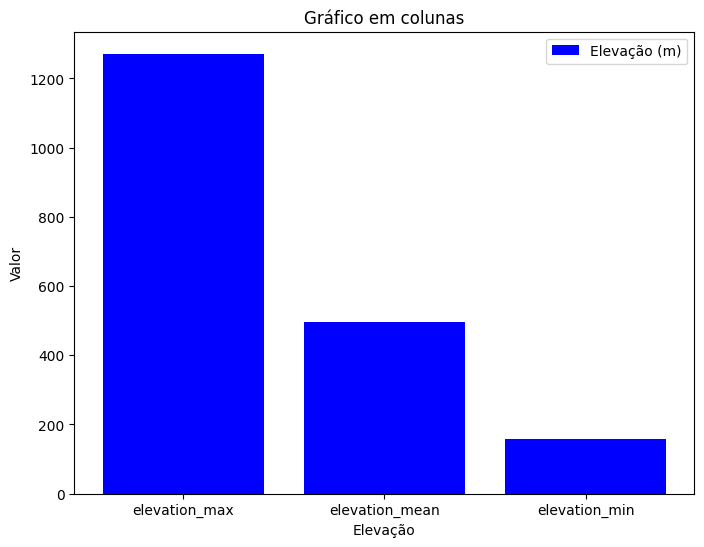

In [24]:
plt.figure(figsize=(8,6))
plt.bar(labels, vals, color='blue')
plt.xlabel('Elevação')
plt.ylabel('Valor')
plt.legend(['Elevação (m)'])
plt.title('Gráfico em colunas')
plt.savefig('grafico_barras.png')
plt.show()

In [25]:
!{sys.executable} -m pip install rasterio -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 57.9 MB/s eta 0:00:00


In [26]:
import rasterio as rio
from rasterio.plot import show
filename = '/content/drive/MyDrive/minicursogee/Srtm_bahia.tif'
raster = rio.open(filename)
raster.meta


{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 7991,
 'height': 6488,
 'count': 1,
 'crs': CRS.from_epsg(4674),
 'transform': Affine(0.00026949458523585647, 0.0, -41.206530566318165,
        0.0, -0.00026949458523585647, -10.272325105435142)}

In [27]:
data = raster.read(1)
data


array([[1237, 1238, 1237, ...,  486,  486,  485],
       [1239, 1239, 1238, ...,  485,  485,  484],
       [1237, 1237, 1237, ...,  484,  484,  484],
       ...,
       [ 715,  711,  715, ...,  191,  191,  192],
       [ 713,  712,  713, ...,  191,  190,  191],
       [ 713,  710,  713, ...,  190,  189,  190]], dtype=int16)

In [28]:
extent = raster.bounds
extent

BoundingBox(left=-41.206530566318165, bottom=-12.020805974445379, right=-39.05299933569844, top=-10.272325105435142)

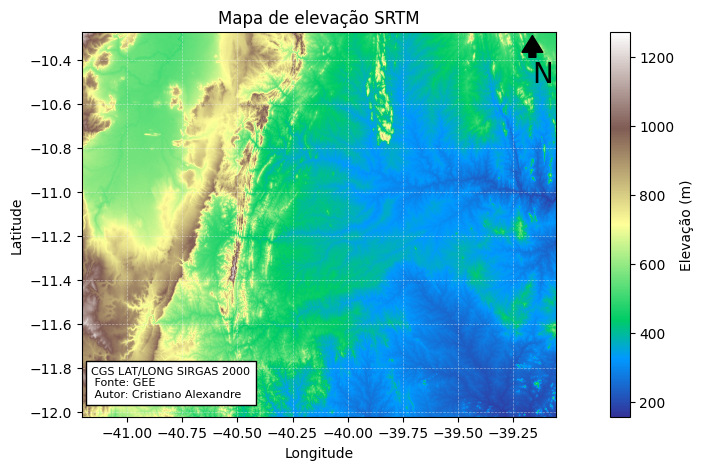

In [30]:
# plotar em escala "terrain"
fig, ax = plt.subplots(1,1, figsize=(14,5)) # imagem 1,1 
img = plt.imshow(data, cmap="terrain")
# adiciona barra de cor a imagem com label "Elevacao (m)"
plt.colorbar(img, label="Elevação (m)")
# rasteriza imagem com a biblioteca rasterio
show(raster, ax=ax, transform=raster.transform, cmap="terrain")
# define os labels e o título
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mapa de elevação SRTM")

# cria um grid 
ax.grid(color="0.95",linestyle="dashed", linewidth=0.5, alpha=0.5)

ax.text(
    0.02,
    0.05, 
    'CGS LAT/LONG SIRGAS 2000''\nFonte: GEE\nAutor: Cristiano Alexandre',
    transform=ax.transAxes, 
    fontsize=8,bbox=dict(facecolor = 'white')
    )

# adiciona o norte
x,y,arrow_length = 0.95,0.99,0.1
ax.annotate(
  'N',
  xy=(x,y),
  xytext=(x,y-arrow_length),
  arrowprops=dict(
      facecolor="black", 
      width=5,headwidth=15),
  va='center',
  fontsize=20,
  xycoords=ax.transAxes
)

plt.savefig('Mapa de elevação.jpg',dpi=300)
plt.show()